<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# Flow fields and differential operators
In this notebook we will introduce basic flow field quantities and how they
can be related to each other on a grid. We rely extensively on grids (or meshes) to
calculate fields, because we usually have to resort to numerical approximation
to solve for these fields.

### Set up the modules

In [1]:
using FluidDynTools

In [2]:
using FluidDynTools.ViscousFlow

In [3]:
using Plots

### Set up a grid on which to construct our fields
You probably will not have any reason to change these, but you're welcome to play around,
of course.
grid cell size

In [4]:
Δx = 0.02

0.02

set the size of a region in which to set up the flow

In [5]:
xlim = (-2,2)
ylim = (-2,2)

(-2, 2)

and make the grid

In [6]:
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((204, 208), (102, 104), 0.02, ((-2.02, 2.02), (-2.06, 2.06)), 10)

Set up some other data structures and operators for later use. This takes a moment,
but you shouldn't need to do this again, as long as you use the same grid.

In [7]:
cache = SurfaceVectorCache(g);

### Types of field quantities on the grid
The grid we have created is called a *staggered* grid, because it stores
different types of quantities at different locations in the grid. The reason
for this is that it ensures that the vector identities between the "real" (continuous)
quantities are also exactly true in a discrete sense (on the grid).

We can think about there being *three different types* of field quantities:
- **Vector fields**, notably the velocity field and its time derivative, acceleration. We can get a basic blank field of this type with `zeros_grid(cache)`

- **Scalar quantities** whose *gradient* produces a vector field. Quantities of this type can also be obtained by taking
the divergence of a vector field. Examples of this type are scalar potential, pressure, and dilation (velocity divergence).
We can get a basic blank field of this type with `zeros_griddiv(cache)`.

- **Rotational vector fields** that have only a single (out-of-plane) component,
    related to vector fields by a *curl* (either by taking a curl of a vector field, or taking a curl
    of the quantitiy to get a vector field). This includes vorticity and vector potential/streamfunction).
    We can get a basic blank field of this type with `zeros_gridcurl(cache)`

These field quantities are related to each other by differential operators (gradient `grad!`,
divergence `divergence!`, and curl `curl!`). Each of those operators can be used here by supplying
three arguments: the first one is the output of the operator, the second one is
the input of the operator, and the third is the cache data `cache`. We will
see examples below.

### Creating a prescribed field on the grid
It is helpful to be able to evaluate a known spatial function $f(x,y)$
on the grid. We can do that for any of the types of field quantities described
above, using the `SpatialField` function. For example, suppose we wish to
create a scalar potential field from the function $f(x,y) = \cos x \sin y$.

First we create the function, "wrapping" it in a `SpatialField`:

In [8]:
f(x,y) = cos(x)*sin(y)
field = SpatialField(f);

Now we create some scalar grid data and evaluate the function in it,
using the `evaluate_field!` function:

In [9]:
ϕ = zeros_griddiv(cache)
evaluate_field!(ϕ,field,cache);

Plot it

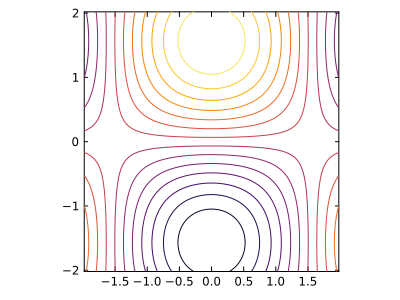

In [10]:
plot(ϕ,cache)

Now try taking the gradient of this to get a velocity field `vel`:

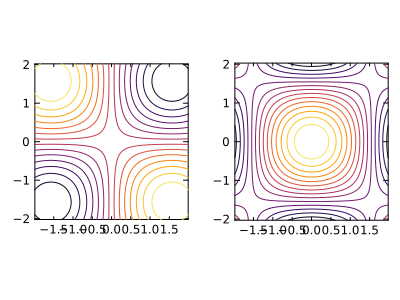

In [11]:
vel = zeros_grid(cache)
grad!(vel,ϕ,cache)
plot(vel,cache)

Is this velocity field diverence free (i.e. incompressible)? Let's see:

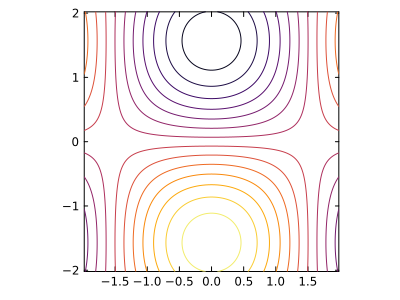

In [12]:
divv = zeros_griddiv(cache)
divergence!(divv,vel,cache)
plot(divv,cache,levels=range(-4,4,length=30))

Doesn't look like it is! Note that we explicitly set the contour levels here
to get the range of values that we want. Sometimes we have to do this.

Notice that we just took the divergence of the gradient of $\phi$. We could have
just taken the Laplacian of this to get the same thing. We have the
`laplacian!` function for this. Let's try it:

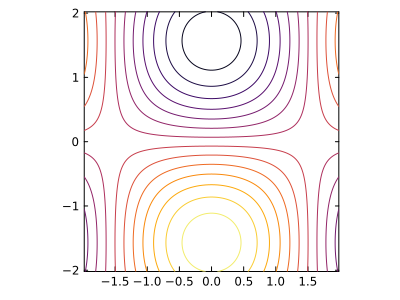

In [13]:
laplacian!(divv,ϕ,cache)
plot(divv,cache,levels=range(-4,4,length=30))

What will happen if we take a curl of this velocity field (to get the vorticity field)? Try it here
and see. First, create blank curl-type data with `zeros_gridcurl(cache)`,
then evaluate the curl on `vel`, and then plot it to see if it is as you expect.

NOTE: When you plot the resulting vorticity field, you should probably explicitly
set the contour levels to have reasonable magnitudes, as in the previous example.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*